In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split

In [57]:
ny_abnb=pd.read_csv(r"C:\Users\frali\Desktop\Data_analysis\new-york-city-airbnb-open-data\AB_NYC_2019.csv")
ny_abnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [7]:
ny_abnb.tail(10)

id                                               name    host_id  \
48885  36482809    Stunning Bedroom NYC! Walking to Central Park!!  131529729   
48886  36483010                    Comfy 1 Bedroom in Midtown East  274311461   
48887  36483152    Garden Jewel Apartment in Williamsburg New York  208514239   
48888  36484087  Spacious Room w/ Private Rooftop, Central loca...  274321313   
48889  36484363                                 QUIT PRIVATE HOUSE  107716952   
48890  36484665    Charming one bedroom - newly renovated rowhouse    8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg    6570630   
48892  36485431            Sunny Studio at Historical Neighborhood   23492952   
48893  36485609               43rd St. Time Square-cozy single bed   30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen   68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48885        Kendall           Manhattan         East Harlem  40.79633   
48886          Scott           Manhattan             Midtown  40.75561   
48887          Melki            Brooklyn        Williamsburg  40.71232   
48888            Kat           Manhattan      Hell's Kitchen  40.76392   
48889        Michael              Queens             Jamaica  40.69137   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48885  -73.93605     Private room     75               2                  0   
48886  -73.96723  Entire home/apt    200               6                  0   
48887  -73.94220  Entire home/apt    170               1                  0   
48888  -73.99183     Private room    125               4                  0   
48889  -73.80844     Private room     65               1                  0   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48885         NaN                NaN                               2   
48886         NaN                NaN                               1   
48887         NaN                NaN                               3   
48888         NaN                NaN                               1   
48889         NaN                NaN                               2   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48885               353  
48886               176  
48887               365  
48888                31  
48889               163  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [30]:
ny_abnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
ny_abnb['neighbourhood'].nunique()

221

In [9]:
len(ny_abnb)

48895

In [10]:
ny_abnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [55]:
ny_abnb.drop(['host_name','last_review'],axis=1,inplace=True)
ny_abnb.head()

KeyError: "['host_name' 'last_review'] not found in axis"

In [12]:
ny_abnb.fillna({'reviews_per_month':0},inplace=True)
ny_abnb.tail(10)

name    host_id  \
48885    Stunning Bedroom NYC! Walking to Central Park!!  131529729   
48886                    Comfy 1 Bedroom in Midtown East  274311461   
48887    Garden Jewel Apartment in Williamsburg New York  208514239   
48888  Spacious Room w/ Private Rooftop, Central loca...  274321313   
48889                                 QUIT PRIVATE HOUSE  107716952   
48890    Charming one bedroom - newly renovated rowhouse    8232441   
48891      Affordable room in Bushwick/East Williamsburg    6570630   
48892            Sunny Studio at Historical Neighborhood   23492952   
48893               43rd St. Time Square-cozy single bed   30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen   68119814   

      neighbourhood_group       neighbourhood  latitude  longitude  \
48885           Manhattan         East Harlem  40.79633  -73.93605   
48886           Manhattan             Midtown  40.75561  -73.96723   
48887            Brooklyn        Williamsburg  40.71232  -73.94220   
48888           Manhattan      Hell's Kitchen  40.76392  -73.99183   
48889              Queens             Jamaica  40.69137  -73.80844   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews  \
48885     Private room     75               2                  0   
48886  Entire home/apt    200               6                  0   
48887  Entire home/apt    170               1                  0   
48888     Private room    125               4                  0   
48889     Private room     65               1                  0   
48890     Private room     70               2                  0   
48891     Private room     40               4                  0   
48892  Entire home/apt    115              10                  0   
48893      Shared room     55               1                  0   
48894     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
48885                0.0                               2               353  
48886                0.0                               1               176  
48887                0.0                               3               365  
48888                0.0                               1                31  
48889                0.0                               2               163  
48890                0.0                               2                 9  
48891                0.0                               2                36  
48892                0.0                               1                27  
48893                0.0                               6                 2  
48894                0.0                               1                23

In [13]:
ny_abnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
ny_abnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [15]:
ny_abnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
top_hosts=ny_abnb.host_id.value_counts().head(10)
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [21]:
sns.set(rc={'figure.figsize':(10,8)})

In [20]:
sub1=ny_abnb.loc[ny_abnb['neighbourhood_group']=='Brooklyn']
price1=sub1[['price']]
sub2=ny_abnb.plot[['neighbourhood_group']=='Manhattan']
pric2=sub2[['price']]
sub3=ny_abnb.loc[ny_abnb['neighbourhood_group']=='Queens']
price3=sub3[['price']]
sub4=ny_abnb.plot[['neighbourhood_group']='Manhattan']
pric4=sub4[['price']]
sub5=ny_abnb.loc[ny_abnb['neighbourhood_group']=='Bronx']
price1=sub5[['price']]
price_list=[pric1,price2,price3,price4,price5]

SyntaxError: invalid syntax (<ipython-input-20-1fb8c4eec424>, line 7)

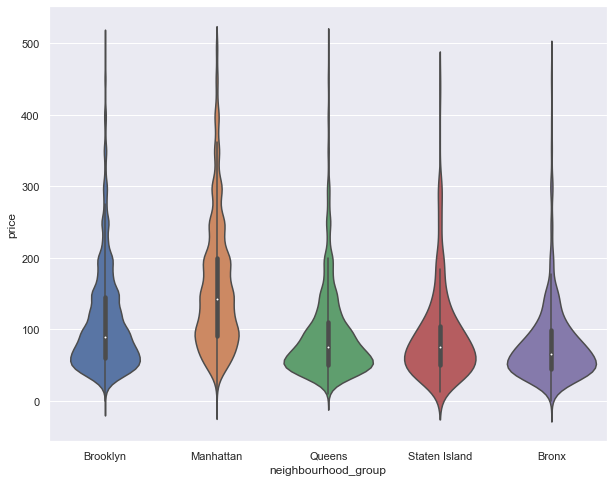

In [22]:
sub6=ny_abnb[ny_abnb.price < 500]
vns=sns.violinplot(data=sub6,x='neighbourhood_group',y='price')

In [23]:
ny_abnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

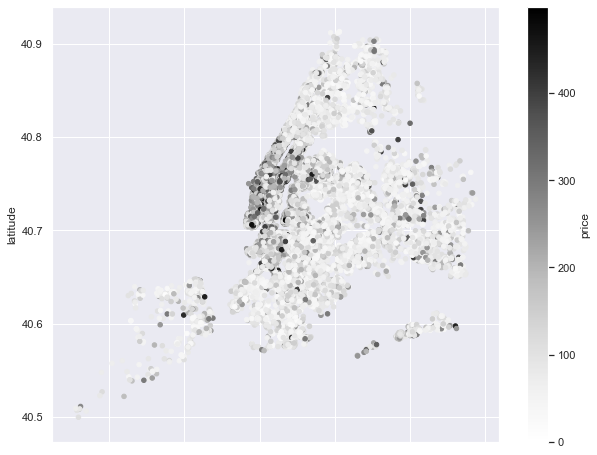

In [24]:
v4=sub6.plot(kind='scatter',x='longitude',y='latitude',c='price',colorbar=True)

In [25]:
top_reviewed=ny_abnb.nlargest(10,'number_of_reviews')
top_reviewed

name   host_id  \
11759                            Room near JFK Queen Bed  47621202   
2031                          Great Bedroom in Manhattan   4734398   
2030                      Beautiful Bedroom in Manhattan   4734398   
2015                        Private Bedroom in Manhattan   4734398   
13495                            Room Near JFK Twin Beds  47621202   
10623                  Steps away from Laguardia airport  37312959   
1879            Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870                  Private brownstone studio Brooklyn  12949460   
471                      LG Private Room/Family Friendly    792159   

      neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews  \
11759     Private room     47               1                629   
2031      Private room     49               1                607   
2030      Private room     49               1                597   
2015      Private room     49               1                594   
13495     Private room     47               1                576   
10623     Private room     46               1                543   
1879      Private room     99               2                540   
20403     Private room     48               1                510   
4870   Entire home/apt    160               1                488   
471       Private room     60               3                480   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

In [26]:
avg_price=top_reviewed.price.mean()
avg_price

65.4

In [32]:
from sklearn.linear_model import LinearRegression
X=ny_abnb[['latitude','longitude','room_type','reviews_per_month']]
Y=ny_abnb[['price']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
ny_abnb.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [34]:
ny_abnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [37]:
room={'Shared room':1,'Private room':2,'Entire home/apt':3}
ny_abnb.room_type=[room[item] for item in ny_abnb.room_type]

In [38]:
ny_abnb.head()

name  host_id  \
0                Clean & quiet apt home by the park     2787   
1                             Skylit Midtown Castle     2845   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3                   Cozy Entire Floor of Brownstone     4869   
4  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude  room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237          2    149   
1           Manhattan       Midtown  40.75362  -73.98377          3    225   
2           Manhattan        Harlem  40.80902  -73.94190          2    150   
3            Brooklyn  Clinton Hill  40.68514  -73.95976          3     89   
4           Manhattan   East Harlem  40.79851  -73.94399          3     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0               0.00   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [43]:
neigh={'Brooklyn':1,'Manhattan':2,'Queens':3,'Staten Island':4,'Bronx':5}
ny_abnb.neighbourhood_group=[neigh[item] for item in ny_abnb.neighbourhood_group]

In [44]:
ny_abnb.tail()

name   host_id  \
48890    Charming one bedroom - newly renovated rowhouse   8232441   
48891      Affordable room in Bushwick/East Williamsburg   6570630   
48892            Sunny Studio at Historical Neighborhood  23492952   
48893               43rd St. Time Square-cozy single bed  30985759   
48894  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
48890                    1              1  40.67853  -73.94995          2   
48891                    1              1  40.70184  -73.93317          2   
48892                    2              2  40.81475  -73.94867          3   
48893                    2              2  40.75751  -73.99112          1   
48894                    2              2  40.76404  -73.98933          2   

       price  minimum_nights  number_of_reviews  reviews_per_month  \
48890     70               2                  0                0.0   
48891     40               4                  0                0.0   
48892    115              10                  0                0.0   
48893     55               1                  0                0.0   
48894     90               7                  0                0.0   

       calculated_host_listings_count  availability_365  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23

In [45]:
from sklearn.linear_model import LinearRegression
X=ny_abnb[['neighbourhood_group','room_type','reviews_per_month']]
Y=ny_abnb[['price']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [46]:
l=LinearRegression()
l.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred=l.predict(X_test)

In [69]:
Y_Pred=l.predict(X)

In [70]:
ny_abnb['Pri']=Y_Pred

In [74]:
res=ny_abnb[['id','Pri']]
print(res)

             id         Pri
0          2539  101.259498
1          2595  213.121394
2          3647  106.724272
3          3831  181.238068
4          5022  214.947862
...         ...         ...
48890  36484665  102.629349
48891  36485057  102.629349
48892  36485431  215.600172
48893  36485609   -2.151628
48894  36487245  106.724272

[48895 rows x 2 columns]


In [76]:
res.to_csv('nyc_submission.csv',index=False)